## Рубежный контроль №1 по курсу Методов Машинного Обучения
#### Выполнил: студент группы ИУ5-25М Мацнев Александр Андреевич, вариант 13

##### Начальная подготовка данных

Иморт необходимых модулей

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

### Задача 1 (13 из списка задач)
##### Условие: Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "обратная зависимость - 1 / X".

Загрузка набора [данных о диабете](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) с сайта scikit-learn.

Легенда:
* age - возраст в годах
* sex - пол
* bmi -индекс массы тела
* bp - среднее давление крови
* s1 tc - общий сывороточный холестерин
* s2 ldl - липопротеины низкой плотности
* s3 hdl - липопротеины высокой плотности
* s4 tch - общий холестерин / ЛПВП
* s5 ltg - возможный журнал уровня триглицеридов в сыворотке крови
* s6 glu - уровень сахара в крови

In [3]:
data_1 = pd.read_csv("diabetes.txt", sep="\t")

In [4]:
data_1.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [5]:
data_1.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


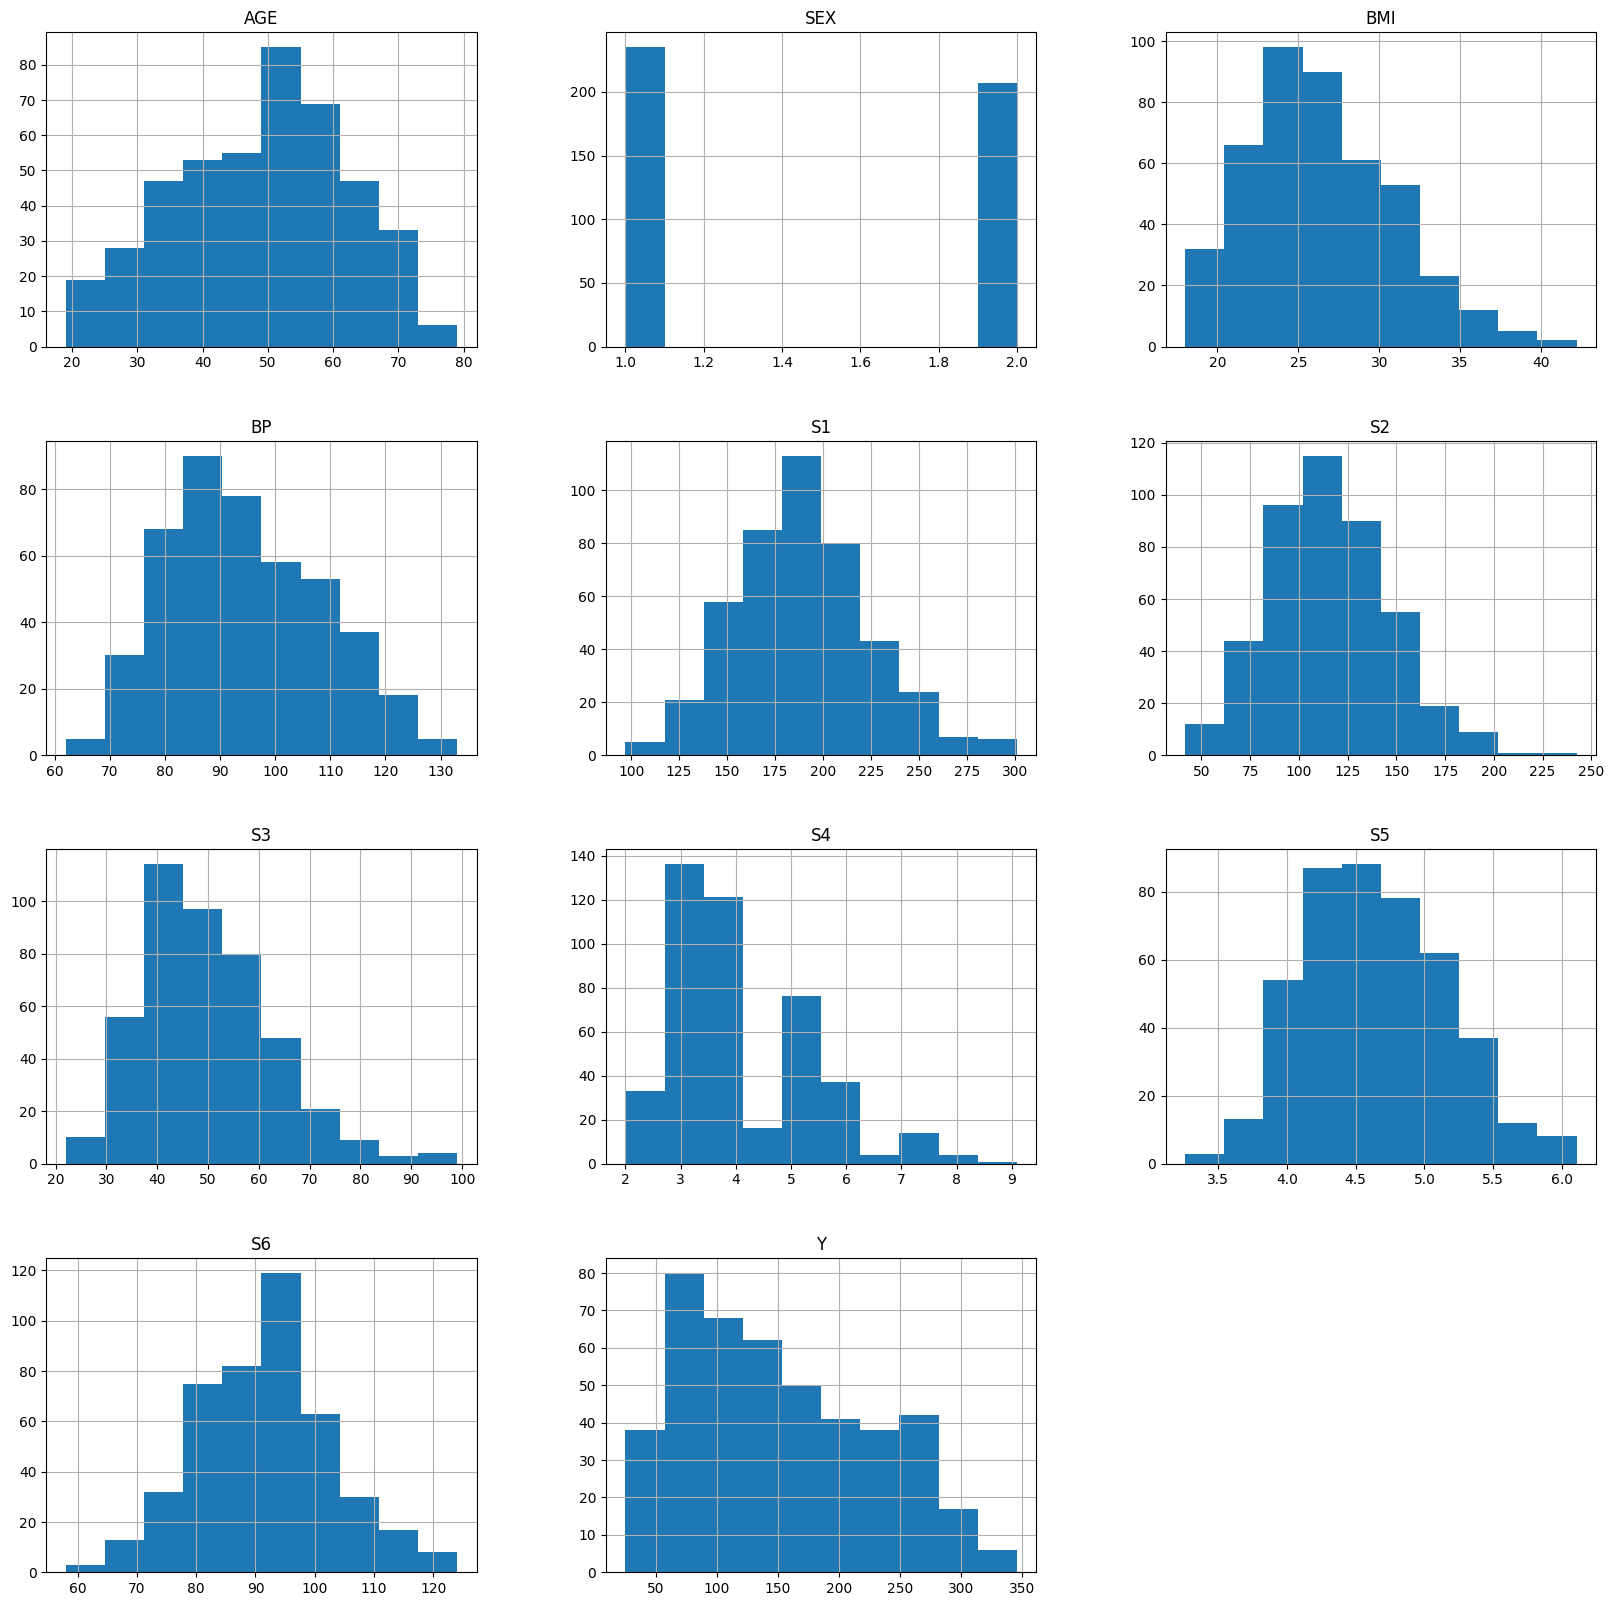

In [6]:
data_1.hist(figsize=(20,20))
plt.show()

Проведём нормализацию для признака S3 - липопротеины высокой плотности

Данные до нормализации


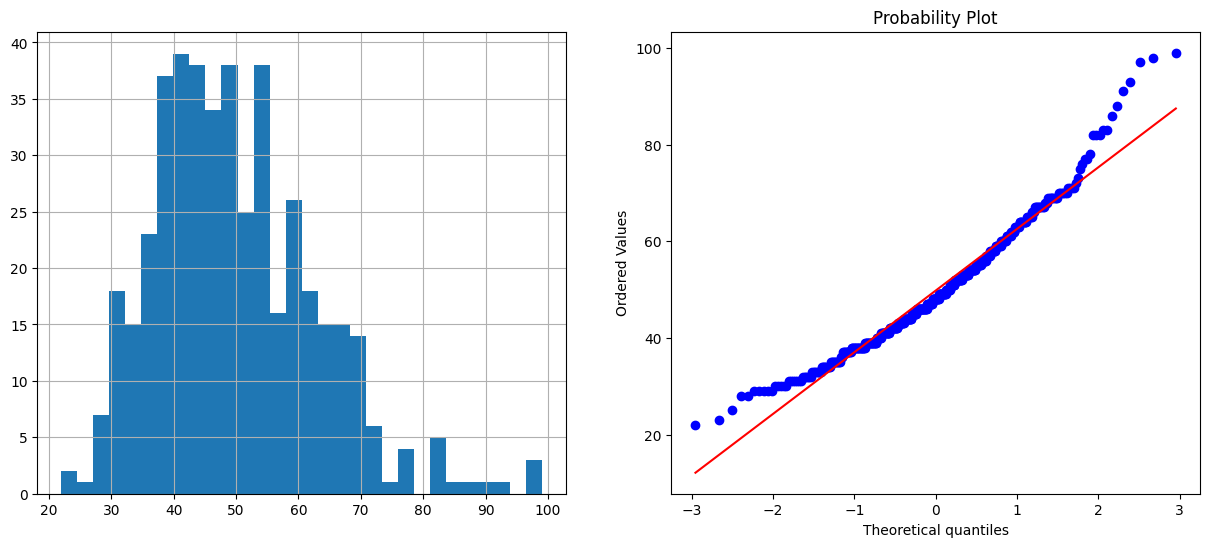

После нормализации


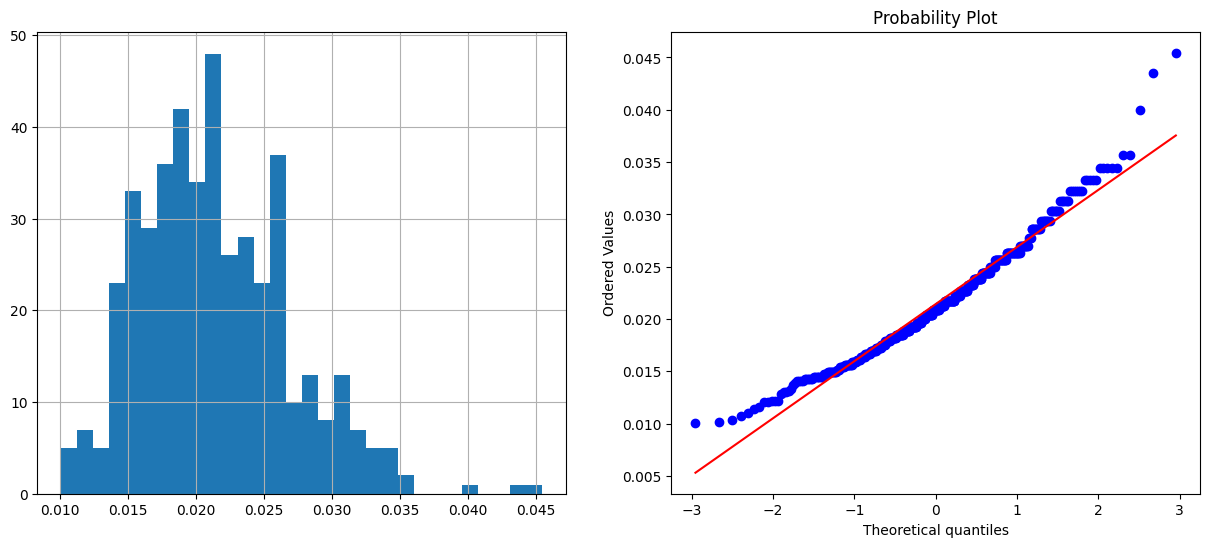

In [7]:
data_1['S3_reciprocal'] = 1 / (data_1['S3'])

print("Данные до нормализации")
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
data_1['S3'].hist(bins=30)
plt.subplot(1, 2, 2)
stats.probplot(data_1['S3'], dist="norm", plot=plt)
plt.show()

print("После нормализации")
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
data_1['S3_reciprocal'].hist(bins=30)
plt.subplot(1, 2, 2)
stats.probplot(data_1['S3_reciprocal'], dist="norm", plot=plt)
plt.show()

###  Задача 2 (33 из списка задач)
##### Условие: Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), алгоритм полного перебора (exhaustive feature selection).

In [23]:
data_2 = pd.read_csv("marks.txt")
data_2.head()

,MID-SEM-MARKS,END-SEM-MARKS,RESULT
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [15]:
knn = KNeighborsClassifier(n_neighbors=3)

In [40]:
efs1 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=4)
data_2.head()

data_2_temp = data_2.drop('RESULT', axis=1)
target = np.ravel(data_2['RESULT'])

efs1 = efs1.fit(data_2_temp, target)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)
